In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%pip install seaborn
import seaborn as sns

In [6]:
dataframe = pd.read_csv('student_data.csv')
dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Data Cleaning

In [7]:
dataframe.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
dataframe.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [9]:
dataframe.shape

(395, 33)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
dataframe.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
dataframe.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Data Visualization and Understanding Relationships

## 1.Histogram

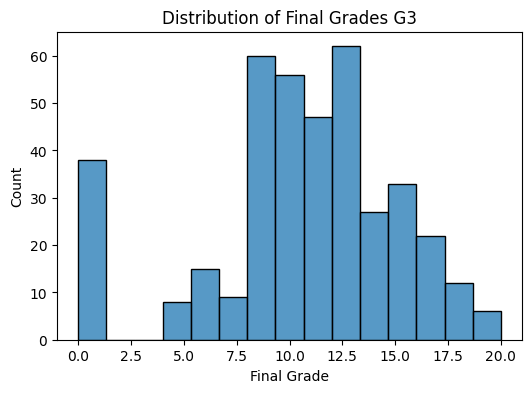

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(dataframe['G3'],  bins=15)
plt.title('Distribution of Final Grades G3')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

In [14]:
print(dataframe.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## 2.Box Plot

<ipython-input-15-f0a98d5eb283>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=dataframe, palette='cool')


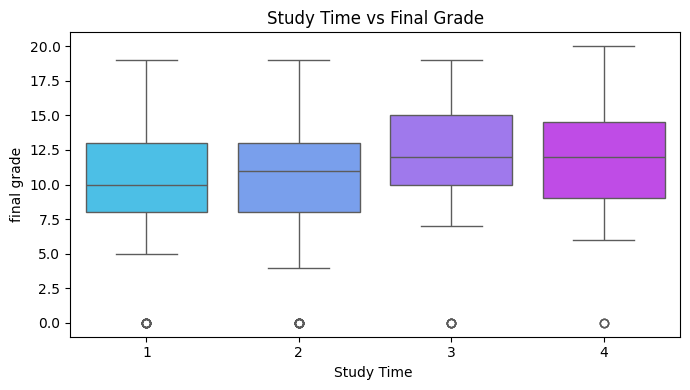

In [15]:
plt.figure(figsize=(7,4))
sns.boxplot(x='studytime', y='G3', data=dataframe, palette='cool')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time ')
plt.ylabel('final grade')
plt.tight_layout()
plt.show()

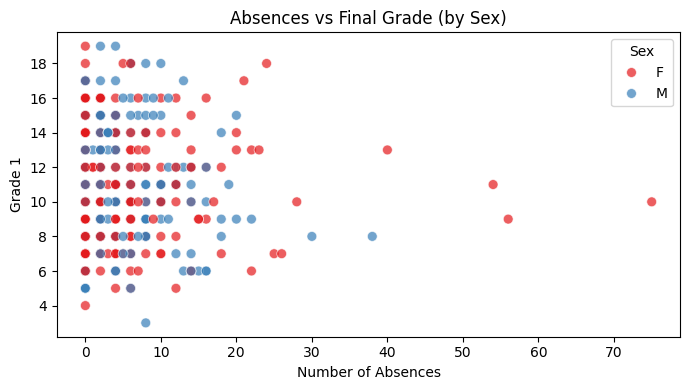

In [16]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='absences', y='G1', hue='sex', data=dataframe, palette='Set1', s=50, alpha=0.7)
plt.title('Absences vs Final Grade (by Sex)')
plt.xlabel('Number of Absences')
plt.ylabel('Grade 1')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

## 3.Histogram for age studytime absences G1 G2

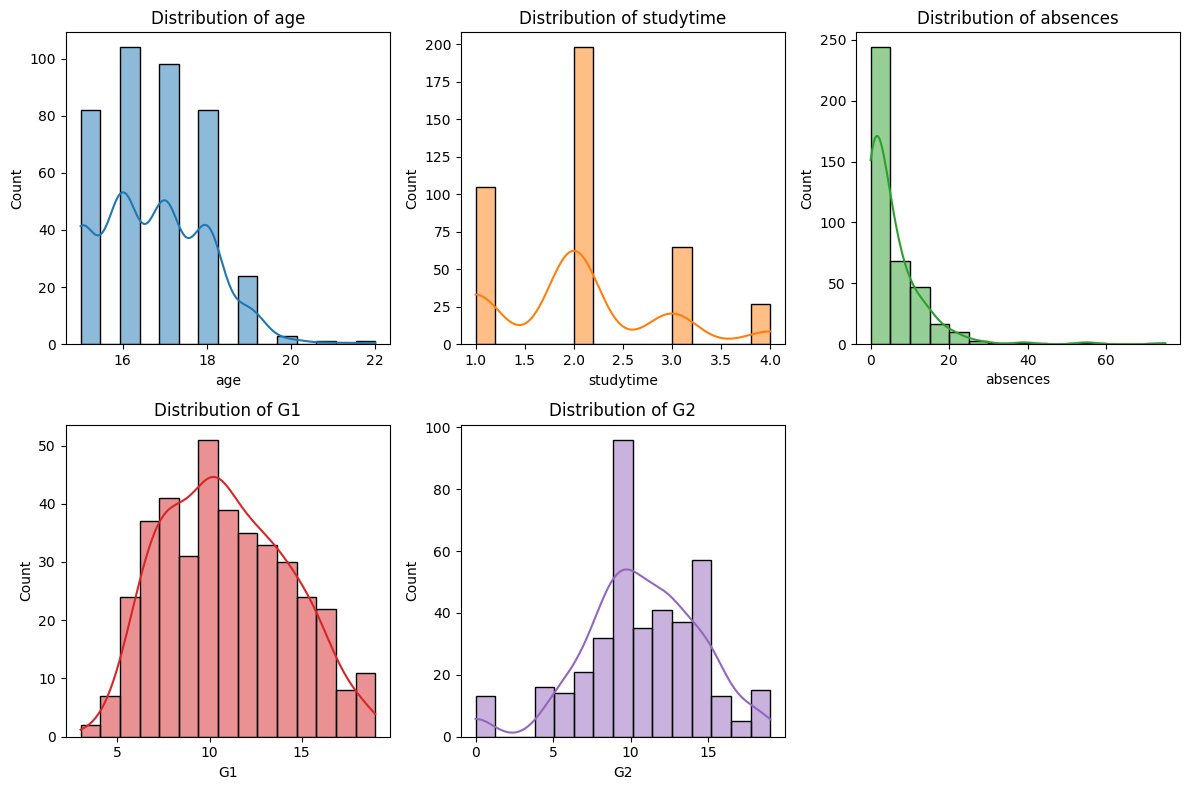

In [17]:
features = ['age', 'studytime', 'absences', 'G1', 'G2']
plt.figure(figsize=(12, 8))
for i, f in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(dataframe[f], kde=True, bins=15, color=f'C{i}', edgecolor='k')
    plt.title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

## Feature Selection

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

X = dataframe.drop("G3", axis=1)  # Features
y = dataframe["G3"]               # Target

#Select top 10 features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

#Get selected feature names
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns)


<class 'ValueError'>: could not convert string to float: 'GP'

## USE ALGORIHAM

## 1.Linear Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

#Encode all object-type columns
for col in dataframe.columns:
    if dataframe[col].dtype == 'object':
        dataframe[col] = label_enc.fit_transform(dataframe[col])

#Define features (X) and target (y)
X = dataframe.drop('G3', axis=1)  # all columns except target
y = dataframe['G3']               # target column


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
ypred = lr.predict(X_test)
ypred

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Create the model
model = LinearRegression()

#Train the model
model.fit(X_train, y_train)

#Predict on test data
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


## 2.Logisic Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Encode categorical features
label_enc = LabelEncoder()
for col in dataframe.columns:
    if dataframe[col].dtype == 'object':
        dataframe[col] = label_enc.fit_transform(dataframe[col])

#Features and target
X = dataframe.drop('G3', axis=1)
y = dataframe['G3']

#For logistic regression, you might want to convert target into classes
y = (y >= 10).astype(int)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Predict and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


## 3.Decision tree Algoriham

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Encode categorical features
label_enc = LabelEncoder()
for col in dataframe.columns:
    if dataframe[col].dtype == 'object':
        dataframe[col] = label_enc.fit_transform(dataframe[col])

#Features and target
X = dataframe.drop('G3', axis=1)
y = dataframe['G3']

#For classification, convert G3 to classes (e.g., pass/fail)
y = (y >= 10).astype(int)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create and train Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Predict and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


## Save the best model

In [ ]:
from sklearn.linear_model import Lasso

#Train the model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)


In [ ]:
import joblib

#Assuming lasso_model is your trained model
best_model = lasso_model

#Save the model
joblib.dump(best_model, 'best_student_performance_model.pkl')

#Load the model
loaded_model = joblib.load('best_student_performance_model.pkl')

#Predict
sample = X_test.iloc[[0]]
prediction = loaded_model.predict(sample)
print("Predicted Final Grade (G3):", prediction)


## Project Conclusion¶